<a href="https://colab.research.google.com/github/CherifArsanious/wrangle-and-analyze-data-project/blob/master/wrangle_act.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data-Analysis-NanoDegree-Udacity-Project-4
## Wrangle-and-Analyze-Data
## Project-done-by-Cherif.Arsanious

## Project-Overview
This project is divided into 3 parts 

1- Wrangle Data

I have to gather data from a csv file prepared by the instructor, a tsv file from a url using the requests library and gather data from twitter api using tweepy. I have to assess the collected data and clean them from dirty and messy data and test to make sure of my cleaning process

2- Storing, analyzing, and visualizing my wrangled data

3- Make 2 reports on my data wrangling efforts and my data analyses and visualizations efforts

First step in my wrangle effort is to import the required libraries that will help me to gather, assess and clean the data

In [0]:
#First I will import the necessary libraries to start my project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
import json

In [2]:
#I should get the needed files that contains my csv and tsv file
!git clone https://github.com/CherifArsanious/wrangle-and-analyze-data-project.git

Cloning into 'wrangle-and-analyze-data-project'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 83 (delta 46), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (83/83), done.


# Data Gathering

## Our first source of data is twitter_archive.csv file
That file was ready available on Udacity platform and just needed to be imported through the right libraries

In [3]:
#importting twitter_archive data using pandas
twitter_archive=pd.read_csv('wrangle-and-analyze-data-project/twitter-archive-enhanced.csv')
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


## Our second source of data is image_prediction.tsv file 
That file was ready to be downloaded through Udacity platform but it was asked to do this task through requests library so i did it by both ways

In [4]:
#The image prediction file was already available in Udacity resources platform and needed only to be imported
image_prediction=pd.read_csv('wrangle-and-analyze-data-project/image-predictions.tsv',sep='\t')
image_prediction.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


The other way to import the image_prediction file by requests library

In [0]:
r=requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').content

In [0]:
import io
df = pd.read_csv(io.StringIO(r.decode('utf-8')),sep='\t')

In [7]:
df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Our third source of data is the twitter api
I will use the twitter api itself to collect two additional columns required in this project(retweet_count, favorite_count). I created a develpoment account on twitter and requested access to their api and was granted access. After that I used twwepy library to download tweets json content to a text file and then read them line by line and create my third dataframe which is ret_fav_count.

Using my granted access token to access the twitter api

In [0]:
''' Code was masked as I was asked to not include my twitter access tokens '''
#auth=tweepy.OAuthHandler()
#auth.set_access_token(,)
#api=tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

' Code was masked as I was asked to not include my twitter access tokens '

In [0]:
tweet=api.get_status(666049248165822465,tweet_mode='extended')
#i will check the different attributes 
tweet

Status(_api=<tweepy.api.API object at 0x7f91b8d9fe80>, _json={'created_at': 'Mon Nov 16 00:24:50 +0000 2015', 'id': 666049248165822465, 'id_str': '666049248165822465', 'full_text': 'Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq', 'truncated': False, 'display_text_range': [0, 120], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666049244999131136, 'id_str': '666049244999131136', 'indices': [97, 120], 'media_url': 'http://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg', 'url': 'https://t.co/4B7cOc1EDq', 'display_url': 'pic.twitter.com/4B7cOc1EDq', 'expanded_url': 'https://twitter.com/dog_rates/status/666049248165822465/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'large': {'w': 768, 'h': 1024, 'resize': 'fit'}, 'medium

In [0]:
#getting to know the json attributes
print(tweet._json)

{'created_at': 'Mon Nov 16 00:24:50 +0000 2015', 'id': 666049248165822465, 'id_str': '666049248165822465', 'full_text': 'Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq', 'truncated': False, 'display_text_range': [0, 120], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666049244999131136, 'id_str': '666049244999131136', 'indices': [97, 120], 'media_url': 'http://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg', 'url': 'https://t.co/4B7cOc1EDq', 'display_url': 'pic.twitter.com/4B7cOc1EDq', 'expanded_url': 'https://twitter.com/dog_rates/status/666049248165822465/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'large': {'w': 768, 'h': 1024, 'resize': 'fit'}, 'medium': {'w': 768, 'h': 1024, 'resize': 'fit'}}}]}, 'extended_enti

In [0]:
tweet._json['id']

666049248165822465

In [0]:
tweet._json['favorite_count']

99

In [0]:
tweet._json['retweet_count']

41

Okay now that i am familiar with the twitter api attributes, I will do the big step of importing all the tweets json content in a 'tweet_json.txt'

After consulting the udacity help communities and mentor community and many trial and error from my side, i finally reached this code.

In [0]:
#This code will not run before entering valid access token key in the previous code cell.!!!!!
#I will create a tweet_json.txt where i will store the tweets json content in it
fails_dict={}
with open('tweet_json.txt', 'w') as outfile:
    for i,id in enumerate(twitter_archive['tweet_id']):
        try:
            tweet = api.get_status(id,tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            print(i,'success')
        except tweepy.TweepError as e:
            print('Fail')
            fails_dict[id]=e
            pass

In [8]:
required_columns = []
with open('tweet_json.txt') as json_file:
    for line in json_file:
        python_format = json.loads(line)
        required_columns.append({'tweet_id':python_format['id'],
                              'favorites':python_format['favorite_count'],
                              'retweets':python_format['retweet_count'],
                              'timestamp':python_format['created_at']})
ret_fav_count=pd.DataFrame(required_columns,columns=['tweet_id','favorites','retweets','timestamp'])
ret_fav_count.head(1)

,tweet_id,favorites,retweets,timestamp
0,892420643555336193,36549,7783,Tue Aug 01 16:23:56 +0000 2017


In [0]:
#I will store the dataframe that i created from twitter in a csv file to save 
#time next time i open this notebook so that i don't have 
#to run the previous steps each time
ret_fav_count.to_csv('ret_fav_count.csv',index=False)

# Data Assessment

## Assessment on twitter_archive data

In [12]:
#inspecting dataframe structure
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
twitter_archive.tail(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


Our data extends from 15-11-2015 to 1-8-2017 time frame

Lets check the number of rows and columns in our dataframe

In [14]:
#numbers of rows and columns in our dataframe
print('number of rows:{} and number of columns:{}'.format(twitter_archive.shape[0],twitter_archive.shape[1]))

number of rows:2356 and number of columns:17


ok, I will check now more information about the 17 columns

In [15]:
#information about our columns and missing values
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
#types of our columns
twitter_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

Now i will check if there are duplicated rows in our dataframe

In [17]:
#checking if the data contains duplicated rows
twitter_archive.duplicated().all()

False

In [18]:
#getting summaries on our numeric columns
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
twitter_archive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


running the describe function on the rating numerator and rating denominator showed that the min in both columns is 0 which is weird that some rating were 0s and the maximum rating_numerator is 1776 which is most certainly could affect our anaylsis and be misleading, and the same goes for the 170 in the denominator rating.

In [20]:
twitter_archive.query('rating_numerator==0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [21]:
twitter_archive.query('rating_numerator==1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [22]:
twitter_archive.query('rating_denominator==0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [23]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
           ... 
Bradley       1
Chubbs        1
Goose         1
Aiden         1
Leonidas      1
Name: name, Length: 957, dtype: int64

The task is to deal with original tweets only but i have 181 retweets and 78 reolies to tweets

In [0]:
# i found that value != np.nan doest work in the queries syntax and using value == value is an acceptable syntax for the same purpose

we have 181 retweets and i found their index

In [0]:
retweets_index=twitter_archive.query('retweeted_status_id == retweeted_status_id').index

we have 78 replies to orignial tweets and i found their index

In [0]:
in_reply_index=twitter_archive.query('in_reply_to_status_id == in_reply_to_status_id').index

I have 59 missing values in expanded_urls and i found their index

In [0]:
expanded_urls_index=twitter_archive.query('expanded_urls != expanded_urls').index

## Assessment on image_prediction data

As usual I will start by checking the number of rows and columns and some initial information about the columns and missing values 

In [28]:
image_prediction.tail(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [29]:
#number of rows and columns in our dataframe
image_prediction.shape

(2075, 12)

Let's check about duplicated rows and it appears that there are no duplicated rows

In [30]:
image_prediction.duplicated().all()

False

Ok I will start by checking the rows that predicted other stuff than dogs and open their urls to check if these tweets contained dogs pictures or not as based on that I will keep these rows or remove them, and after checking these rows by random check, I found out that these tweets do contain dogs and the model wrongly interpreted them as other stuff

In [31]:
image_prediction.query('p1_dog==False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


## Assessment on ret_fav_count data (data collected from twitter api)

Now I will assess our third source of data by checking its numbers of rows and columns and getting information about columns types and missing values and checking for duplicated rows and inspecting the file on google sheets for further inspection

In [32]:
ret_fav_count.head()

,tweet_id,favorites,retweets,timestamp
0,892420643555336193,36549,7783,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,31477,5766,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,23733,3816,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,39862,7947,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,38086,8586,Sat Jul 29 16:00:24 +0000 2017


In [33]:
#number of rows and columns in our datafrmae
ret_fav_count.shape

(2331, 4)

Now lets see the information about the columns

In [34]:
ret_fav_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
tweet_id     2331 non-null int64
favorites    2331 non-null int64
retweets     2331 non-null int64
timestamp    2331 non-null object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


I don't have duplicated rows in this dataframe

In [35]:
ret_fav_count.duplicated().all()

False


### Quality Issues Observed
- timestamp in twitter_archive is of type object and not timedate
- rating_numerator in twitter_archive is of type integer instead of float
- rating_denominator in twitter_archive is of type integer instead of float
- Extraction of rating_numerator and rating_denominator values are correct for some rows
- 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' columns in twitter_archive are all missing values and are of no signicficance to our analysis 
- None values in name column in twitter_archive instead of np.nan
- 'a' values in name column in twitter_archive instead of np.nan
- None values in dogs stages are not interpreted as np.nan in twitter_archive
- dogs' breeds are not consistent ( some are capital and some are not) in image_prediction dataframe
- timestamp should be treated as timestamp not object type
- 'p1' column name in image_prediction dataframe is not a suitable name to indicate that this column is dog breed predicted. It is a confusing name
- 'p2' is a confusing name and not indicating dog breed indincated
- 'p2-dog' is a confusing name to indicate that it is the probability of being a dog or not
- Do i need all the columns in image_prediction data frame
- image_prediction assumed that some images don't belong to dogs and interpreted other stuff than dogs and which is not true 
- timestamp in ret_fav_count dataframe of object type 
- 181 retweets found and not original tweets
- 78 reply to tweets and not original tweets
- 59 missing values in expanded urls 
- extreme min and max values in numerator and denominator ratings

### Tidiness Issues Observed 
- 3 tables that have common columns 
- doggo, floofer, pupper, puppo should be stacked in one column

# Data Cleaning 

I will first create three copies of our three dataframes to start the cleaning process without missing with the original dataframe

In [0]:
#making new copies of our dataframes to start the cleaning process
twitter_archive_clean=twitter_archive.copy()
image_prediction_clean=image_prediction.copy()
ret_fav_count_clean=ret_fav_count.copy()

### Define
Change timestamp in twitter_archive is from type object to type timedate

**Code**

In [0]:
#converting timestamp type from object to datetime
twitter_archive_clean['timestamp']=pd.to_datetime(twitter_archive_clean['timestamp'])

Test

In [107]:
#test our cleaning step
twitter_archive_clean.timestamp.dtypes

datetime64[ns, UTC]

### Define
Correctly extract the ratings

**Code**

In [0]:
rating = twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)',expand=True)
rating.columns=['rating_numerator','rating_denominator']

In [0]:
twitter_archive_clean['rating_numerator']=rating['rating_numerator']

In [0]:
twitter_archive_clean['rating_denominator']=rating['rating_denominator']

In [111]:
twitter_archive_clean[['rating_numerator','rating_denominator']].dtypes

rating_numerator      object
rating_denominator    object
dtype: object

**Test**

In [112]:
rating['rating_numerator'].sort_values()

315        0
1016       0
387      007
1869       1
1940       1
        ... 
1689     9.5
695     9.75
340     9.75
313      960
1228      99
Name: rating_numerator, Length: 2356, dtype: object

In [113]:
rating['rating_denominator'].sort_values()

313     00
0       10
1564    10
1565    10
1566    10
        ..
516      7
433     70
1843    80
1254    80
1228    90
Name: rating_denominator, Length: 2356, dtype: object

In [114]:
rating.dtypes

rating_numerator      object
rating_denominator    object
dtype: object

### Define
Change rating_numerator column in twitter_archive from to float

**Code**

In [0]:
twitter_archive_clean['rating_numerator']=twitter_archive_clean['rating_numerator'].astype('float')

**Test**

In [116]:
twitter_archive_clean['rating_numerator'].sample(5)

1943    12.0
1657     9.0
1719    12.0
2351     5.0
865     11.0
Name: rating_numerator, dtype: float64

### Define
Change rating_denominator column in twitter_achive dataframe from integer to float

**Code**

In [0]:
twitter_archive_clean['rating_denominator']=twitter_archive_clean['rating_denominator'].astype('float')

**Test**

In [118]:
twitter_archive_clean['rating_denominator'].sample(5)

437     10.0
2161    10.0
974     10.0
8       10.0
496     10.0
Name: rating_denominator, dtype: float64

### Define
Drop rows where expanded_urls are missing

Code

In [0]:
expanded_urls_index=twitter_archive_clean.query('expanded_urls != expanded_urls').index
twitter_archive_clean=twitter_archive_clean.drop(expanded_urls_index,axis=0)

Test

In [120]:
twitter_archive.info

<bound method DataFrame.info of                 tweet_id  in_reply_to_status_id  ...  pupper puppo
0     892420643555336193                    NaN  ...    None  None
1     892177421306343426                    NaN  ...    None  None
2     891815181378084864                    NaN  ...    None  None
3     891689557279858688                    NaN  ...    None  None
4     891327558926688256                    NaN  ...    None  None
...                  ...                    ...  ...     ...   ...
2351  666049248165822465                    NaN  ...    None  None
2352  666044226329800704                    NaN  ...    None  None
2353  666033412701032449                    NaN  ...    None  None
2354  666029285002620928                    NaN  ...    None  None
2355  666020888022790149                    NaN  ...    None  None

[2356 rows x 17 columns]>

### Define
Drop 181 rows where there are retweets since we are only interested in orginal tweets

**Code**

In [0]:
retweets_index=twitter_archive_clean.query('retweeted_status_id == retweeted_status_id').index
twitter_archive_clean=twitter_archive_clean.drop(retweets_index,axis=0)

**Test**

In [122]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Define
Drop 78 rows where there are replies to tweets since we are only interested in original tweets

**Code**

In [0]:
in_reply_index=twitter_archive_clean.query('in_reply_to_status_id == in_reply_to_status_id').index
twitter_archive_clean=twitter_archive_clean.drop(in_reply_index,axis=0)

**Test**

In [124]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null datetime64[ns, UTC]
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null float64
rating_denominator            2094 non-null float64
name                          2094 non-null object
doggo                         2094 non-null object
floofer                       2094 non-null object
pupper                        2094 non-null object
puppo                         2094 non-null object
dtypes: datetime64[ns, 

### Define
Drop 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' columns in twitter_archive as they are all missing values and are of no signicficance to our analysis as we are only interested in original tweets

**Code**

In [125]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [0]:
twitter_archive_clean=twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'],axis=1)

**Test**

In [127]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Define
Replace None values in name column in twitter_archive with np.nan

**Code**

In [128]:
#Although they are 745 missing names in name columns but python can't detect them as they are written as None
twitter_archive_clean.name.isnull().all()

False

In [129]:
twitter_archive_clean.name.value_counts()

None       600
a           55
Lucy        11
Charlie     11
Cooper      10
          ... 
Darrel       1
Ridley       1
Raphael      1
Dallas       1
Noah         1
Name: name, Length: 955, dtype: int64

In [0]:
twitter_archive_clean.name=twitter_archive_clean.name.replace('None',np.nan)

**Test**

In [131]:
twitter_archive_clean.name.value_counts()

a          55
Charlie    11
Lucy       11
Oliver     10
Cooper     10
           ..
Pip         1
Darrel      1
Ridley      1
Raphael     1
Noah        1
Name: name, Length: 954, dtype: int64

### Define
Replace 'a' values in name column in twitter_archive with of np.nan

**Code**

In [0]:
twitter_archive_clean.name=twitter_archive_clean.name.replace('a',np.nan)

**Test**

In [133]:
twitter_archive_clean.name.value_counts()

Lucy       11
Charlie    11
Oliver     10
Cooper     10
Penny       9
           ..
Willie      1
Lugan       1
Darrel      1
Ridley      1
Buddah      1
Name: name, Length: 953, dtype: int64

### Define
make breed name consistent with lower case only( some are capital and some are not) in image_prediction dataframe

In [134]:
image_prediction_clean.p1.head(20)

0     Welsh_springer_spaniel
1                    redbone
2            German_shepherd
3        Rhodesian_ridgeback
4         miniature_pinscher
5       Bernese_mountain_dog
6                 box_turtle
7                       chow
8              shopping_cart
9           miniature_poodle
10          golden_retriever
11             Gordon_setter
12              Walker_hound
13                       pug
14                bloodhound
15                     Lhasa
16            English_setter
17                       hen
18          desktop_computer
19         Italian_greyhound
Name: p1, dtype: object

**Code**

In [0]:
image_prediction_clean.p1=image_prediction_clean.p1.str.lower()

**Test**

In [136]:
image_prediction_clean.p1.head(20)

0     welsh_springer_spaniel
1                    redbone
2            german_shepherd
3        rhodesian_ridgeback
4         miniature_pinscher
5       bernese_mountain_dog
6                 box_turtle
7                       chow
8              shopping_cart
9           miniature_poodle
10          golden_retriever
11             gordon_setter
12              walker_hound
13                       pug
14                bloodhound
15                     lhasa
16            english_setter
17                       hen
18          desktop_computer
19         italian_greyhound
Name: p1, dtype: object

### Define
change 'p1' column name in image_prediction dataframe which is not a suitable name to indicate that this column is dog breed predicted. It is a confusing name so I will replace with dog_breed

**Code**

In [137]:
image_prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [0]:
image_prediction_clean=image_prediction_clean.rename(columns={'p1':'dog_breed'})

**Test**

In [139]:
image_prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'dog_breed', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Define
Drop columns ['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']
by inspection on google sheets, theses columns have predicted other stuff than dogs so they are not reliable to our project as by random inspection all tweets contained dogs picture and we are only interesting in dogs breeds in this dataframe so they are quality issues for me and i will drop these columns

**Code**

In [0]:
image_prediction_clean=image_prediction_clean.drop(['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

**Test**

In [141]:
image_prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'dog_breed', 'p1_conf', 'p1_dog'], dtype='object')

### Define
Change ['p1_conf','p1_dog'] to ['prediction_confidence','dog'] respectively

**Code**

In [0]:
image_prediction_clean=image_prediction_clean.rename(columns={'p1_conf':'prediction_confidence','p1_dog':'dog'})

**Test**

In [143]:
image_prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'dog_breed', 'prediction_confidence',
       'dog'],
      dtype='object')

### Define
change the values in breed column that do not belong to dogs to np.nan
image_prediction assumed that some images don't belong to dogs and interpreted other stuff than dogs and which is not true

**Code**

In [144]:
image_prediction_clean.query('dog==False')

,tweet_id,jpg_url,img_num,dog_breed,prediction_confidence,dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False
...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False


by random inspection of these urls, I found that they contained dogs picture and the model failed to predict them so I need to change these breed values to np.nan

In [0]:
not_breed=list(image_prediction_clean.query('dog==False')['dog_breed'])

In [0]:
image_prediction_clean['dog_breed']=image_prediction_clean['dog_breed'].replace(not_breed,np.nan)

**Test**

In [147]:
image_prediction_clean.query('dog==False')

,tweet_id,jpg_url,img_num,dog_breed,prediction_confidence,dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,NaN,0.933012,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,NaN,0.962465,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,NaN,0.965932,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,NaN,0.086502,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,NaN,0.914671,False
...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,NaN,0.949591,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,NaN,0.738995,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,NaN,0.130432,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,0.170278,False


### Define
Drop dog column now that we don't need it anymore

**Code**

In [0]:
image_prediction_clean=image_prediction_clean.drop(['dog'],axis=1)

**Test**

In [149]:
image_prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'dog_breed', 'prediction_confidence'], dtype='object')

### Define
Change 'name' column name to 'dog_name' to avoid confusion

**Code**

In [0]:
twitter_archive_clean=twitter_archive_clean.rename(columns={'name':'dog_name'})

**Test**

In [151]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'dog_name', 'doggo',
       'floofer', 'pupper', 'puppo'],
      dtype='object')

### Define
change timestamp type from object to datetime in ret_fav_count dataframe

**Code**

In [0]:
ret_fav_count['timestamp']=pd.to_datetime(ret_fav_count['timestamp'])

**Test**

In [153]:
ret_fav_count.timestamp.dtypes

datetime64[ns, UTC]

### Define
Drop rows where denominator are not equal to our standard 10

**Code**

In [154]:
twitter_archive_clean[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2094.000000,2094.000000
mean,12.149847,10.449379
std,40.367823,6.649800
min,0.000000,2.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [0]:
twitter_archive_clean=twitter_archive_clean.drop(twitter_archive_clean.query('rating_denominator!=10').index,axis=0)

**Test**

In [156]:
twitter_archive_clean[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2077.000000,2077.0
mean,11.657573,10.0
std,39.818470,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,1776.000000,10.0


### Define
Drop rows where rating_numerator are equal to 0 or those whose have rating above 20

**Code**

In [0]:
twitter_archive_clean=twitter_archive_clean.drop(twitter_archive_clean.query('rating_numerator == 0').index,axis=0)

In [0]:
twitter_archive_clean=twitter_archive_clean.drop(twitter_archive_clean.query('rating_numerator >= 20').index,axis=0)

**Test**

In [159]:
twitter_archive_clean[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2074.000000,2074.0
mean,10.615612,10.0
std,2.138985,0.0
min,1.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,14.000000,10.0


## Clean step2
### Tidiness
### Define
Stack dog stages in one column

**Code**

In [161]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'dog_name', 'doggo',
       'floofer', 'pupper', 'puppo'],
      dtype='object')

In [0]:
#the code did not work for me and created a 4 times bigger dataframe that i could not handle so i had to think of another solution
#twitter_archive_clean=pd.melt(twitter_archive_clean,id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls','rating_numerator', 'rating_denominator', 'dog_name'],value_vars=['doggo',
#'floofer', 'pupper', 'puppo'],var_name='dog_stage')

This cleaning step combines both a quality cleaning issue and a tidiness issue

the documentation in this website helped me
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.cat.html

In [0]:
# first i will replace none
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)

# merge into column
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

# handle multiple stages
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == '', 'dog_stage'] = np.nan

In [0]:
twitter_archive_clean=twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

**Test**

In [167]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'dog_name', 'dog_stage'],
      dtype='object')

In [166]:
twitter_archive_clean.dog_stage.value_counts()

pupper            220
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

### Define
Merge the three dataframes together in a master one

**Code**

In [0]:
twitter_archive_master=pd.merge(left=twitter_archive_clean,right=image_prediction_clean,on='tweet_id')

In [0]:
twitter_archive_master=pd.merge(left=twitter_archive_master,right=ret_fav_count_clean, on='tweet_id')

In [170]:
twitter_archive_master.head(2)

,tweet_id,timestamp_x,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,img_num,dog_breed,prediction_confidence,favorites,retweets,timestamp_y
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,0.097049,36549,7783,2017-08-01 16:23:56+00:00
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,31477,5766,2017-08-01 00:17:27+00:00


**Test**

In [171]:
twitter_archive_master.shape

(1944, 16)


### Define
I will rearrange columns for better convenience 

**Code**

In [172]:
twitter_archive_master.columns

Index(['tweet_id', 'timestamp_x', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'dog_name', 'dog_stage',
       'jpg_url', 'img_num', 'dog_breed', 'prediction_confidence', 'favorites',
       'retweets', 'timestamp_y'],
      dtype='object')

In [0]:
twitter_archive_master=twitter_archive_master[['tweet_id','favorites', 'retweets','dog_name','dog_breed','dog_stage','rating_numerator', 'rating_denominator', 'source', 'text', 'expanded_urls', 'jpg_url', 'img_num', 'prediction_confidence', 'timestamp_y','timestamp_x']]

**Test**

In [174]:
twitter_archive_master.head(1)

,tweet_id,favorites,retweets,dog_name,dog_breed,dog_stage,rating_numerator,rating_denominator,source,text,expanded_urls,jpg_url,img_num,prediction_confidence,timestamp_y,timestamp_x
0,892420643555336193,36549,7783,Phineas,NaN,NaN,13.0,10.0,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,0.097049,2017-08-01 16:23:56+00:00,2017-08-01 16:23:56+00:00


### Storing
I will store the twitter_archive_master as a csv file and also a database table

In [0]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

In [0]:
from sqlalchemy import create_engine

In [0]:
engine = create_engine('sqlite:///twitter_archive_master.db')

In [0]:
twitter_archive_master.to_sql('master',engine,index=False)

# Analysis and Visualizations

After gathering, assessing, cleaning and storing our data. It is time now to do some analysis and visualization to have some usefull insights on our data about the twitter account WeRateDogs. 

By running the describe method, I observed the following thing:

- Favorites (or like) column has a minimum of 72 likes and it goes to tweet_id 666102155909144576 and this tweet also received the lowest retweet of 11 retweets only. The dog is english_setter and actually it did get a high rating of 11/10. Favorites column has a mean of 8400 likes. It has a maximum of 157953 and it goes to to tweet_id 744234799360020481 and also this tweet recieved the highest retweets number of 78695. The highest likes went to a labrador_retriever in doggo stage with a rating of 13/10

- The highest rating in our wrangled data is 14/10 and it belongs to 33 tweets. The lowest rating was 1/10 and it went to 4 tweets (The tweets_id of the the lowest and hightest ratings are found in the code cells). The average rating is 10/10 but by running the value_counts() on the rating_numerator I found that 12/10 is the mode rating with a frequency of 444 tweets. The top 3 breeds that received the highest rating are pembroke(4)
french_bulldog(2),and golden_retriever(2)

By running the corr() method on the twitter_archive_master data frame, I observed:
- Weak postive pearson correlation between retweets count and rating_numerator with a value 0.29. This suggests that a high rating dog by the account admin doesn't guarantee that the followers will retweet these posts and the other way arround
- Moderate postive pearson correlation between favourites count and rating_numerator with a value 0.39. This suggests that a high rating dog by the account admin doesn't guarantee that the followers will like these posts and the other way arround

By plotting a scatter plot between retweets count and favourites counts:
- There is a strong positive pearson correlation between favourites count and retweets counts with peasron correlation of 0.929. This indicates only a relational but says not about causation, I can imply that one caused the other. 


In [179]:
#Using describe() method to analyze our data
twitter_archive_master.describe()

,tweet_id,favorites,retweets,rating_numerator,rating_denominator,img_num,prediction_confidence
count,1.944000e+03,1944.000000,1944.000000,1944.000000,1944.0,1944.000000,1944.000000
mean,7.359373e+17,8400.470165,2493.080761,10.542068,10.0,1.201646,0.593523
std,6.759869e+16,12365.778380,4465.795203,2.158454,0.0,0.558910,0.272184
min,6.660209e+17,72.000000,11.000000,1.000000,10.0,1.000000,0.044333
25%,6.757942e+17,1784.500000,555.500000,10.000000,10.0,1.000000,0.360456
50%,7.084748e+17,3799.000000,1204.500000,11.000000,10.0,1.000000,0.587222
75%,7.880674e+17,10462.500000,2851.250000,12.000000,10.0,1.000000,0.845599
max,8.924206e+17,157953.000000,78695.000000,14.000000,10.0,4.000000,1.000000


In [180]:
twitter_archive_master.query('favorites==72')

,tweet_id,favorites,retweets,dog_name,dog_breed,dog_stage,rating_numerator,rating_denominator,source,text,expanded_urls,jpg_url,img_num,prediction_confidence,timestamp_y,timestamp_x
1927,666102155909144576,72,11,NaN,english_setter,NaN,11.0,10.0,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1,0.298617,2015-11-16 03:55:04+00:00,2015-11-16 03:55:04+00:00


In [181]:
twitter_archive_master.query('favorites==157953')

,tweet_id,favorites,retweets,dog_name,dog_breed,dog_stage,rating_numerator,rating_denominator,source,text,expanded_urls,jpg_url,img_num,prediction_confidence,timestamp_y,timestamp_x
758,744234799360020481,157953,78695,NaN,labrador_retriever,doggo,13.0,10.0,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,0.825333,2016-06-18 18:26:18+00:00,2016-06-18 18:26:18+00:00


In [182]:
list(twitter_archive_master.query('rating_numerator==14')['tweet_id'])

[890240255349198849,
 887517139158093824,
 884441805382717440,
 881536004380872706,
 878057613040115712,
 870063196459192321,
 868880397819494401,
 864873206498414592,
 860184849394610176,
 856282028240666624,
 854120357044912130,
 852226086759018497,
 851464819735769094,
 841439858740625411,
 832273440279240704,
 831911600680497154,
 828650029636317184,
 828381636999917570,
 825535076884762624,
 822462944365645825,
 821407182352777218,
 820314633777061888,
 819006400881917954,
 819004803107983360,
 813812741911748608,
 807621403335917568,
 794205286408003585,
 778408200802557953,
 774314403806253056,
 762035686371364864,
 755206590534418437,
 742465774154047488,
 685547936038666240]

In [183]:
twitter_archive_master.query('rating_numerator==14')['dog_breed'].value_counts()

pembroke                   4
golden_retriever           2
french_bulldog             2
standard_poodle            1
chihuahua                  1
black-and-tan_coonhound    1
rottweiler                 1
samoyed                    1
gordon_setter              1
pomeranian                 1
bedlington_terrier         1
eskimo_dog                 1
irish_setter               1
bloodhound                 1
Name: dog_breed, dtype: int64

In [184]:
twitter_archive_master.rating_numerator.value_counts()

12.00    444
10.00    416
11.00    392
13.00    249
9.00     149
8.00      95
7.00      51
14.00     33
6.00      32
5.00      32
3.00      19
4.00      15
2.00       9
1.00       4
9.75       1
11.26      1
13.50      1
11.27      1
Name: rating_numerator, dtype: int64

Text(0.5, 1.0, 'Distribution of Dogs Ratings')

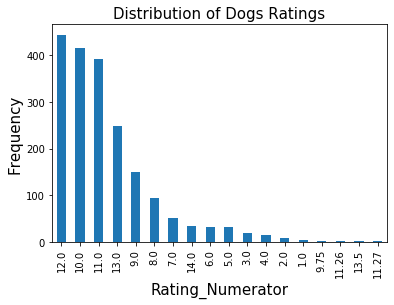

In [185]:
twitter_archive_master.rating_numerator.value_counts().plot(kind='bar')
plt.xlabel('Rating_Numerator',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribution of Dogs Ratings',fontsize=15)

In [186]:
twitter_archive_master.corr()

,tweet_id,favorites,retweets,rating_numerator,rating_denominator,img_num,prediction_confidence
tweet_id,1.000000,0.613941,0.387181,0.542602,NaN,0.212935,0.101166
favorites,0.613941,1.000000,0.929135,0.401192,NaN,0.125980,0.070926
retweets,0.387181,0.929135,1.000000,0.300635,NaN,0.101660,0.049743
rating_numerator,0.542602,0.401192,0.300635,1.000000,NaN,0.202009,0.105720
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN
img_num,0.212935,0.125980,0.101660,0.202009,NaN,1.000000,0.200773
prediction_confidence,0.101166,0.070926,0.049743,0.105720,NaN,0.200773,1.000000


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])


Text(0.5, 1.0, 'Relational Plot between Favourites Counts and Retweets Counts')

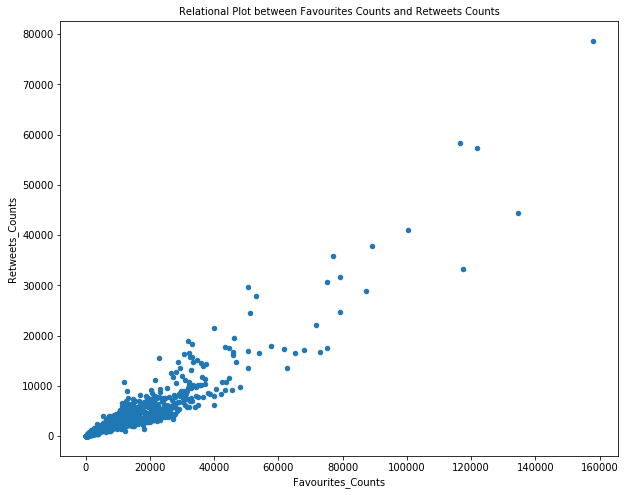

In [192]:
twitter_archive_master.plot(x='favorites',y='retweets',kind='scatter',figsize=(10,8));
plt.xlabel('Favourites_Counts',fontsize=10)
plt.ylabel('Retweets_Counts',fontsize=10)
plt.title('Relational Plot between Favourites Counts and Retweets Counts',fontsize=10)

In [188]:
twitter_archive_master[['favorites','retweets']].corr()

,favorites,retweets
favorites,1.000000,0.929135
retweets,0.929135,1.000000


Text(0.5, 1.0, 'Relation bet. Time and Rating of Dogs')

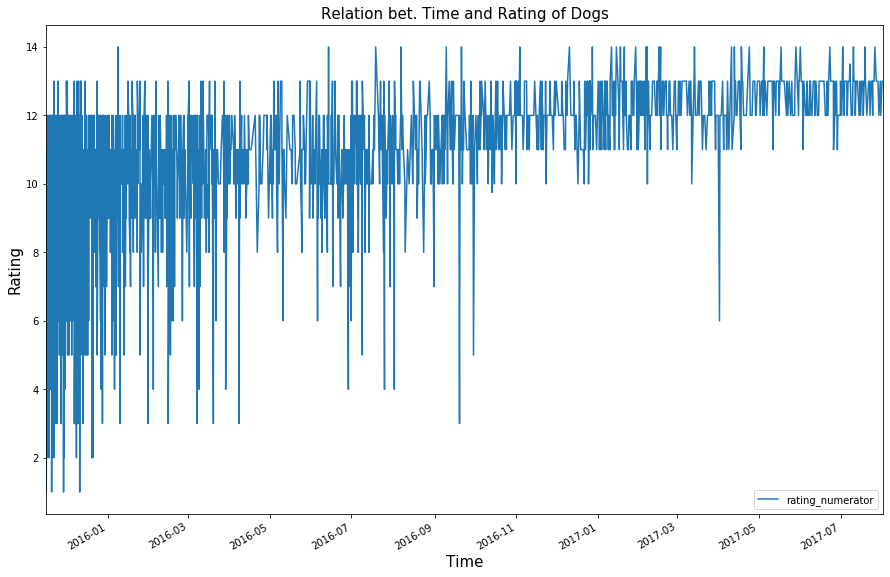

In [189]:
twitter_archive_master.plot(x='timestamp_x',y='rating_numerator',kind='line',figsize=(15,10))
plt.xlabel('Time',fontsize=15)
plt.ylabel('Rating',fontsize=15)
plt.title('Relation bet. Time and Rating of Dogs',fontsize=15)

In [190]:
breeds=twitter_archive_master.groupby(by='dog_breed').rating_numerator.mean().sort_values(ascending=False).head(20)
breeds

dog_breed
saluki                     12.500000
briard                     12.333333
tibetan_mastiff            12.250000
border_terrier             12.142857
silky_terrier              12.000000
standard_schnauzer         12.000000
eskimo_dog                 11.777778
gordon_setter              11.750000
irish_setter               11.750000
samoyed                    11.743590
golden_retriever           11.630597
chow                       11.609756
cardigan                   11.529412
australian_terrier         11.500000
giant_schnauzer            11.500000
wire-haired_fox_terrier    11.500000
great_pyrenees             11.461538
kelpie                     11.454545
pembroke                   11.443182
norfolk_terrier            11.333333
Name: rating_numerator, dtype: float64

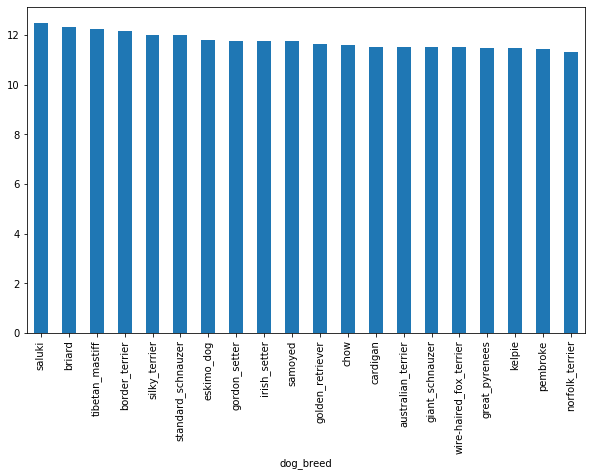

In [191]:
breeds.plot(kind='bar',figsize=(10,6))